## Most Frequent Category Imputation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Dataset Link: https://www.kaggle.com/datasets/alphaepsilon/housing-prices-dataset?select=train.csv

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
missing_categorical_columns = [column for column in df.columns if df[column].nunique()<10 and df[column].isnull().mean()>0]

In [5]:
len(missing_categorical_columns)

16

In [6]:
df[missing_categorical_columns].isnull().sum()

Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [7]:
df[missing_categorical_columns].isnull().mean()

Alley           0.937671
MasVnrType      0.597260
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

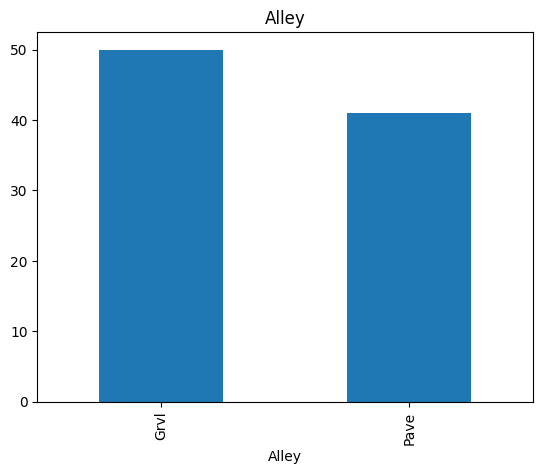

In [8]:
df[missing_categorical_columns[0]].value_counts().plot(kind="bar")
plt.title(missing_categorical_columns[0])
plt.show()

In [9]:
print("Column:", missing_categorical_columns[0])
print(df[missing_categorical_columns[0]].value_counts())

Column: Alley
Alley
Grvl    50
Pave    41
Name: count, dtype: int64


In [10]:
print("Column:", missing_categorical_columns[0])
print(df[missing_categorical_columns[0]].mode()[0])

Column: Alley
Grvl


In [11]:
# dropping columns with more than 80% values as missing
columns_to_be_dropped = [column for column in missing_categorical_columns if df[column].isnull().mean()>=0.8]

In [12]:
columns_to_be_dropped

['Alley', 'PoolQC', 'Fence', 'MiscFeature']

In [13]:
df.shape

(1460, 81)

In [14]:
df.drop(columns=columns_to_be_dropped, inplace=True)
df.shape

(1460, 77)

In [15]:
missing_categorical_columns = [column for column in missing_categorical_columns if column not in columns_to_be_dropped]
missing_categorical_columns

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [16]:
df[missing_categorical_columns].isnull().mean()

MasVnrType      0.597260
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [17]:
for column in missing_categorical_columns:
    df[column].fillna(value=df[column].mode()[0], inplace=True)

In [18]:
df[missing_categorical_columns].isnull().mean()

MasVnrType      0.0
BsmtQual        0.0
BsmtCond        0.0
BsmtExposure    0.0
BsmtFinType1    0.0
BsmtFinType2    0.0
Electrical      0.0
FireplaceQu     0.0
GarageType      0.0
GarageFinish    0.0
GarageQual      0.0
GarageCond      0.0
dtype: float64